# Image Processing


## Introduction

Often, you will need to process a number of images across an entire data set hosted on IPFS. For example, the entire [Landsat data dataset is hosted on IPFS ](https://ipfs.io/ipfs/QmeZRGhe4PmjctYVSVHuEiA9oSXnqmYa4kQubSHgWbjv72). This is many thousands of images, it would be very convenient to run a job against the data without having to download it!

This page is a demo of a data intensive image processing workload run on Bacalhau that transforms very high resolution imagery into thumbnail-size pictures.
It is an example of a highly parellizable compute task where a resize function is applied over a large number of files.
For a live walk through of this demo please watch the first part of the video below, otherwise feel free to run the demo yourself by following the steps below.

[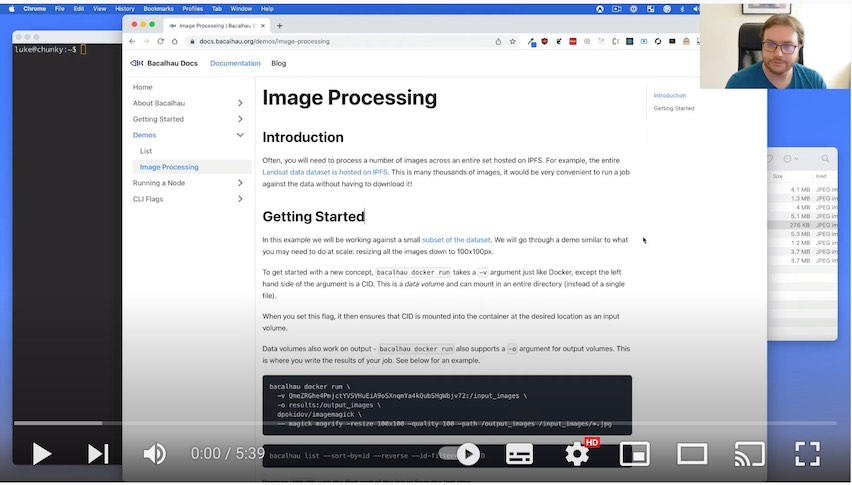]((https://www.youtube.com/watch?v=wkOh05J5qgA))

<!-- [![image](./Bacalhau_Intro_Video.jpg)](https://www.youtube.com/watch?v=wkOh05J5qgA) -->

## Prerequistes

Make sure you have the latest `bacalhau` client installed by following the [getting started instructions](../../getting-started/installation).

In [2]:
!bacalhau version

Client Version: v0.2.3
Server Version: v0.2.3


## Submit the workload

In this example we will be working against a small [subset of the dataset](https://ipfs.io/ipfs/QmeZRGhe4PmjctYVSVHuEiA9oSXnqmYa4kQubSHgWbjv72). We will go through a demo similar to what you may need to do at scale: resizing all the images down to 100x100px.

To get started with a new concept, `bacalhau docker run` allows you to pass input data volume with a `-v CID:path` argument just like Docker, except the left hand side of the argument is a [content identifier (CID)](https://github.com/multiformats/cid).
This results in a *data volume* and can mount in an entire directory (instead of a single file).

When you set this flag, it then ensures that CID is mounted into the container at the `path` location as an input volume.

Data volumes also work on output - by default `bacalhau docker run` always creates an output data volume mounted at `/outputs`.
This is a convenient location to store the results of your job. See below for an example.

In [1]:
!bacalhau docker run \
  -v QmeZRGhe4PmjctYVSVHuEiA9oSXnqmYa4kQubSHgWbjv72:/input_images \
  dpokidov/imagemagick:7.1.0-47-ubuntu \
  -- magick mogrify -resize 100x100 -quality 100 -path /outputs '/input_images/*.jpg'

9536e23c-4a1e-4e73-a85a-3e81101f26d4


The job has been submitted and Bacalhau has printed out the related job id.
We store that in an environment variable so that we can reuse it later on.

In [5]:
%env JOB_ID=9536e23c
!bacalhau list --id-filter=${JOB_ID}

env: JOB_ID=9536e23c
 CREATED   ID        JOB                      STATE      VERIFIED  PUBLISHED               
 15:11:16  9536e23c  Docker dpokidov/imag...  Published            /ipfs/bafybeidtitnyf... 


Since the job state is published/complete, the job result can be downloaded locally.
We achieve that in the next section.

## Get results

First, let us create a new directory that will store our job outputs.
Second, use the `get` verb to download the job outputs into the current directory.
_This command prints out a number of verbose logs, although these meant for Bacalhau developers you may want to ignore them (this will soon: [issue #614](https://github.com/filecoin-project/bacalhau/issues/614))._

In [9]:
!mkdir -p /tmp/img-demo
!bacalhau get ${JOB_ID} --output-dir /tmp/img-demo

17:15:26.617 | INF bacalhau/get.go:67 > Fetching results of job '9536e23c'...
17:15:30.609 | INF ipfs/downloader.go:115 > Found 1 result shards, downloading to temporary folder.
17:15:37.696 | INF ipfs/downloader.go:195 > Combining shard from output volume 'outputs' to final location: '/tmp/img-demo'


Now, the docker run command above used the `outputs` volume as a results folder so when we download them they will be stored in a homonymous folder within `volumes/`.

In [10]:
ls -l /tmp/img-demo/volumes/outputs/

total 384
-rw-r--r--  1 enricorotundo  staff  14536 Sep 14 17:15 cafires_vir_2021231_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  34594 Sep 14 17:15 greatsaltlake_oli_2017210_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  12928 Sep 14 17:15 greecefires_oli_2021222_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  16705 Sep 14 17:15 haitiearthquake_oli_20212_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  42427 Sep 14 17:15 iwojima_tmo_2021225_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  10419 Sep 14 17:15 lakemead_etm_2000220_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  13467 Sep 14 17:15 lapalma_oli_2021141_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  13687 Sep 14 17:15 spainfire_oli_2021227_lrg.jpg
-rw-r--r--  1 enricorotundo  staff  15476 Sep 14 17:15 sulphursprings_oli_2019254_lrg.jpg


## Where to go next?

* [How to run an existing workload on Bacalhau](../../../getting-started/workload-onboarding).
* [Check out the Bacalhau CLI Reference page](../../../all-flags).

## Support

Please reach out to the [Bacalhau team via Slack](https://filecoinproject.slack.com/archives/C02RLM3JHUY) to seek help or in case of any issues.